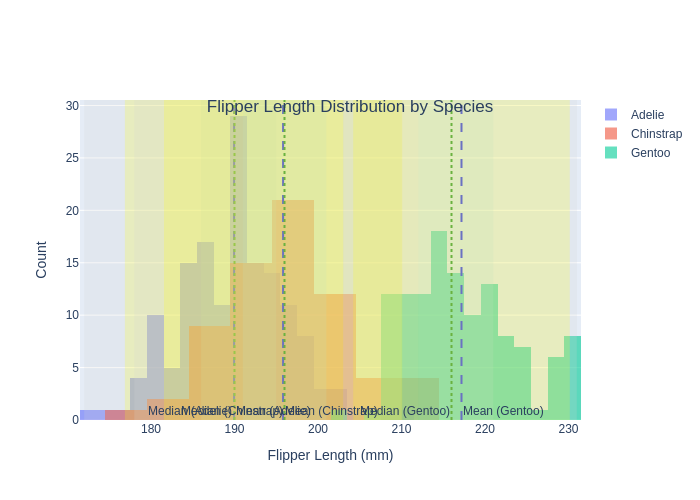

In [12]:
###1.

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Remove rows with missing values for simplicity
penguins = penguins.dropna(subset=["flipper_length_mm", "species"])

# Create an empty Plotly figure
fig = go.Figure()

# Loop through each species and create a separate histogram
for species in penguins['species'].unique():
    # Filter data for the current species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    std = species_data.std()
    iqr = np.percentile(species_data, 75) - np.percentile(species_data, 25)
    min_value = species_data.min()
    max_value = species_data.max()
    q1 = np.percentile(species_data, 25)
    q3 = np.percentile(species_data, 75)

    # Create the histogram for this species
    fig.add_trace(go.Histogram(x=species_data, name=f'{species}', opacity=0.6))

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line_dash="dash", line_color="blue", 
                  annotation_text=f'Mean ({species})', annotation_position="bottom right")
    fig.add_vline(x=median, line_dash="dot", line_color="green", 
                  annotation_text=f'Median ({species})', annotation_position="bottom left")
    
    # Add vertical rectangles for the range and interquartile range (IQR)
    fig.add_vrect(x0=min_value, x1=max_value, fillcolor="lightgrey", opacity=0.2, line_width=0)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="lightblue", opacity=0.2, line_width=0)

    # Add vertical rectangle for ±2 standard deviations from the mean
    fig.add_vrect(x0=mean - 2 * std, x1=mean + 2 * std, fillcolor="yellow", opacity=0.2, line_width=0)

# Update layout with more space for the title
fig.update_layout(
    barmode='overlay', 
    title=dict(
        text='Flipper Length Distribution by Species',
        y=0.9,  # Move the title up
        pad=dict(t=50)  # Add more padding above the title
    ),
    xaxis_title='Flipper Length (mm)', 
    yaxis_title='Count',
    title_x=0.5  # Center the title
)

# Show the plot
fig.show(renderer="png")


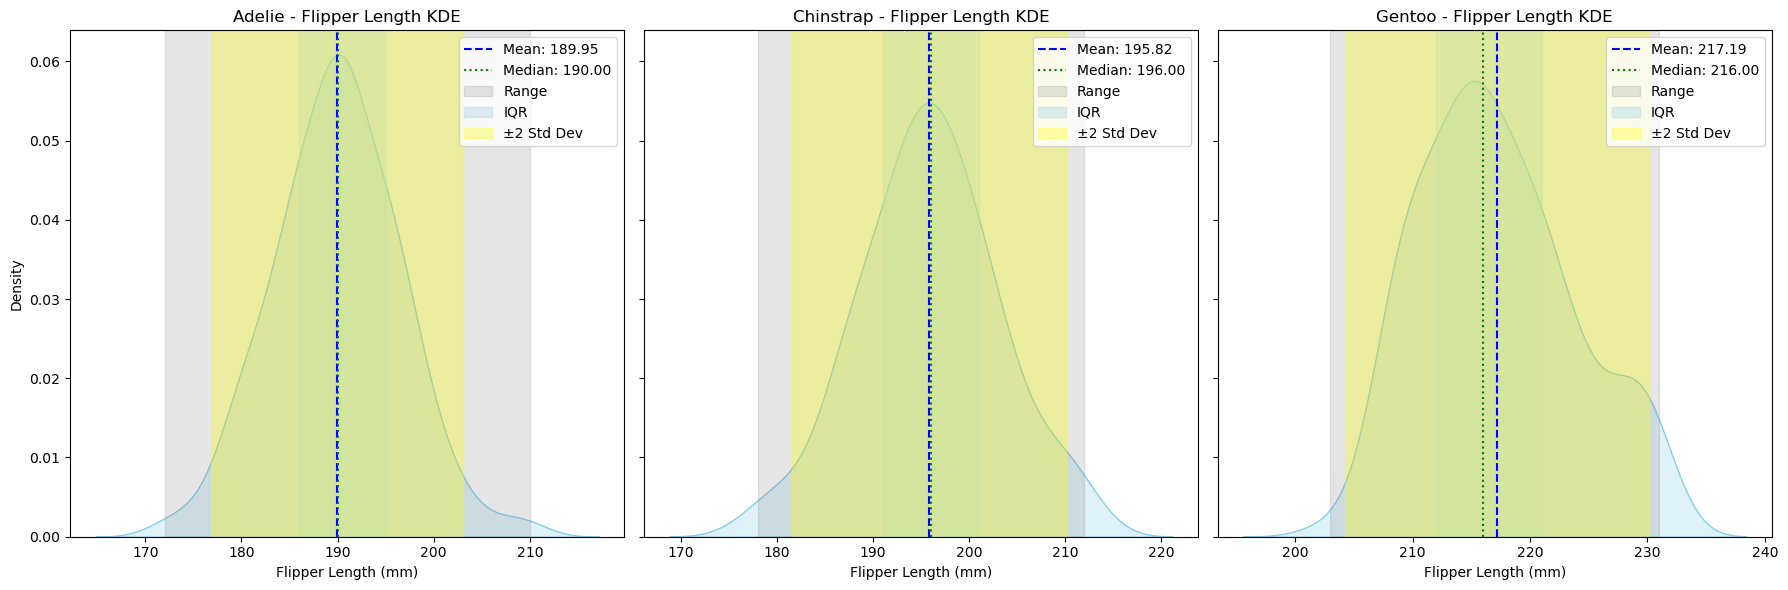

In [3]:
###2.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Remove rows with missing values
penguins = penguins.dropna(subset=["flipper_length_mm", "species"])

# Define species
species_list = penguins['species'].unique()

# Set up the figure and axes (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop through each species and create a KDE plot with annotations
for i, species in enumerate(species_list):
    # Filter data for the current species
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    median = species_data.median()
    std = species_data.std()
    min_value = species_data.min()
    max_value = species_data.max()
    q1 = np.percentile(species_data, 25)
    q3 = np.percentile(species_data, 75)

    # Create KDE plot
    sns.kdeplot(species_data, ax=axes[i], fill=True, color='skyblue')
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f}')
    axes[i].axvline(median, color='green', linestyle=':', label=f'Median: {median:.2f}')
    
    # Add shaded regions for the range, IQR, and 2 standard deviations
    axes[i].axvspan(min_value, max_value, color='grey', alpha=0.2, label='Range')
    axes[i].axvspan(q1, q3, color='lightblue', alpha=0.4, label='IQR')
    axes[i].axvspan(mean - 2 * std, mean + 2 * std, color='yellow', alpha=0.3, label='±2 Std Dev')

    # Set title and labels
    axes[i].set_title(f"{species} - Flipper Length KDE")
    axes[i].set_xlabel("Flipper Length (mm)")
    
    # Add a legend
    axes[i].legend()

# Set common y-axis label
axes[0].set_ylabel("Density")

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
fig.show()



In [4]:
###3.

## My contrasting descriptions

# Box Plot:

# A box plot summarizes a distribution using five key statistics: the minimum, first quartile (Q1), median, third quartile (Q3), and maximum. 
# It also displays potential outliers using individual points
# It is best for comparing distributions across groups, identifying outliers, and summarizing data spread in a compact form.

# Histogram:

# A histogram visualizes the frequency of data points falling within certain ranges. 
# The y-axis of the histogram represents the count of data points, and the x-axis represents the data range.
# It is best for giving a direct count of data within certain intervals, providing an immediate sense of distribution shape and spread.

# Kernel Density Estimator (KDE):
# KDE is a smoothed version of the histogram.
# It estimates the probability density function of the data by summing up the influence of each data point based on a smoothing kernel.
# It is best for showing a smoothed approximation of the distribution, making it easier to see patterns, multiple peaks, and the overall shape without the 'jaggedness' of histograms.

## Chatbot Response:

# Your descriptions of the box plot, histogram, and kernel density estimator (KDE) are clear and accurate. 
# Here's a brief review of pros and cons of the three "data distribution" visualization methods :


# Box Plot:

# Pros:
# Compact, clear summary of distribution.
# Great for comparing multiple groups.
# Highlights outliers.

# Cons:
# Does not show the full shape of the distribution (e.g., modality, skewness).
# Can be less intuitive for those unfamiliar with quartiles.


# Histogram:

# Pros:
# Simple to interpret.
# Shows the exact frequency of data in intervals.
# Good for visualizing large datasets.

# Cons:
# Bin size affects the result (too many or too few bins can obscure patterns).
# Doesn’t capture smooth variations well.
# Can be jagged, making it hard to detect smooth patterns.


# KDE:

# Pros:
# Provides a smooth representation of the distribution.
# Makes it easier to identify underlying trends and multiple peaks.
# Less sensitive to bin size (as in histograms).

# Cons:
# Can be misleading if not carefully chosen (e.g., bandwidth too wide or too narrow).
# Requires some statistical understanding to interpret correctly.


## My Preference and Rationale:

# Personally, I prefer KDE because it gives a smooth, continuous representation of the data's distribution, making it easy to identify patterns and the overall shape without being affected by bin sizes (like in histograms). 
# The clarity of trends and the ability to visualize subtle features like multiple modes make KDE a great tool for exploratory data analysis. 
# Moreover, although I prefer KDE the most, I acknowledge that box plots are incredibly useful for comparing multiple groups, and histograms provide a direct, intuitive view of data frequencies.



In [5]:
###4.

#1

# A And C

#2

# B And C

#3

# A and C

#4

# A and D

In [ ]:
### Session summary of the 'Pre - Lecture' part of the HW (1-4)

## KDE Plots:

# You requested assistance in creating Seaborn kernel density estimation (KDE) plots for flipper_length_mm in the penguins dataset, including annotations for mean, median, range, interquartile range, and ±2 standard deviations.


## Example Code for KDE Plots:

# I (the chatbot) provided example code to generate three KDE plots in a row using Seaborn and Matplotlib, complete with statistical annotations.


## Visualization Methods:

# We discussed three data distribution visualization methods:

    # Box Plot: Summarizes key statistics, highlights outliers, but lacks full distribution shape.
    # Histogram: Displays frequency counts, intuitive, but sensitive to bin sizes.
    # KDE: Offers a smooth representation of distributions, useful for trend identification, but requires careful bandwidth selection.

# Pros and Cons:
    
# We listed the advantages and disadvantages of each method, focusing on their effectiveness in visualizing data distributions.

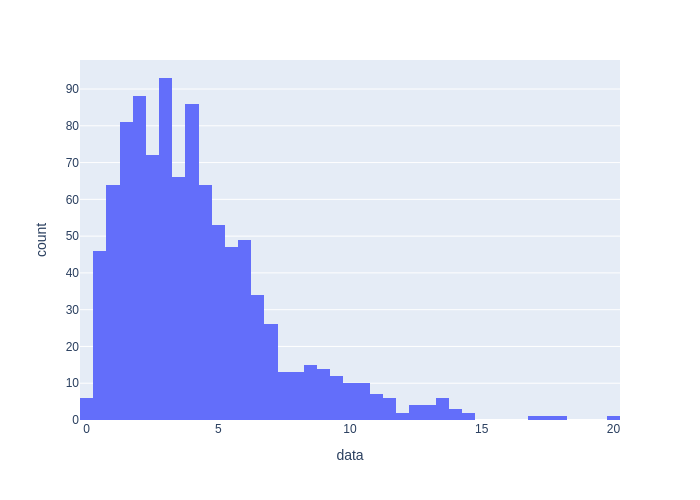

In [23]:
###5.

##Code Breakdown:

from scipy import stats
import pandas as pd
import numpy as np

# This imports necessary libraries: 'scipy' for statistical functions, 'pandas' for data manipulation, and 'numpy' for numerical operations.

sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
#Here, a sample of 1,000 random variables is generated from a gamma distribution with shape parameter a=2 and scale parameter scale=2. The gamma distribution is typically right-skewed when a is less than 3.

fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
fig1.show(renderer="png")
# This part of the code creates a histogram of the generated sample data. 

sample1.mean()
np.quantile(sample1, [0.5]) # median

# The mean of sample1 is calculated using sample1.mean(), and the median is computed using NumPy's quantile function.


sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

# This generates a second sample of 1,000 random variables from a gamma distribution, but negates the values, which can create a left-skewed distribution.

## What Does The Code Do?

# It generates a right-skewed distribution (sample1) and visualizes it with a histogram.
# It calculates both the mean and median of the right-skewed data.
# It generates a left-skewed distribution (sample2) by negating a right-skewed gamma distribution.

# In summary, this code is designed to explore the differences and relationships between the mean and median for right-skewed and left-skewed distributions, while visualizing their shapes.


## The relationship between the mean and median and "right" and "left" skewness and what causes this:

# In a right-skewed distribution, like sample1, the tail extends to the right, pulling the mean above the median since higher values in the tail heavily influence the average. 
# In contrast, a left-skewed distribution, like sample2, has a longer left tail, causing the mean to be less than the median as smaller values pull the mean down more than they affect the midpoint.
# In summary, in right-skewed distributions, the mean is greater than the median, while in left-skewed distributions, the mean is less. 
# This occurs because extreme values impact the mean more than the median.



In [ ]:
# Session summary for question 5:

# In this session, we explored the relationship between the mean and median in right-skewed and left-skewed distributions using Python. We started by breaking down a code snippet that involves generating random samples from a gamma distribution, visualizing the data with histograms, and calculating the mean and median for each distribution. Here's what we covered:

## Right-Skewed Distribution:

# Generated a right-skewed dataset using the gamma distribution.
# Calculated the mean and median, showing that the mean is greater than the median due to the right tail pulling the mean up.
# Visualized the distribution using a histogram.

## Left-Skewed Distribution:

# Created a left-skewed distribution by negating the values of a right-skewed sample.
# Demonstrated that the mean is less than the median because of the left tail pulling the mean down.
# Also visualized the left-skewed data.

# We discussed how the mean is influenced by extreme values in the tails of skewed distributions, while the median represents the middle value and is less sensitive to such outliers.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          743 non-null    object
 1   Intelligence  743 non-null    int64 
 2   Strength      743 non-null    int64 
 3   Speed         743 non-null    int64 
 4   Durability    743 non-null    int64 
 5   Power         743 non-null    int64 
 6   Combat        743 non-null    int64 
 7   Alter Egos    743 non-null    object
 8   Publisher     735 non-null    object
 9   Alignment     737 non-null    object
 10  Gender        743 non-null    object
 11  Race          448 non-null    object
 12  Height        743 non-null    object
 13  Weight        743 non-null    object
 14  Eye color     572 non-null    object
 15  Hair color    573 non-null    object
 16  Skin color    75 non-null     object
 17  Total Power   743 non-null    int64 
dtypes: int64(7), object(11)
memory usage: 104.6+ KB
  

/tmp/ipykernel_54/2289559002.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




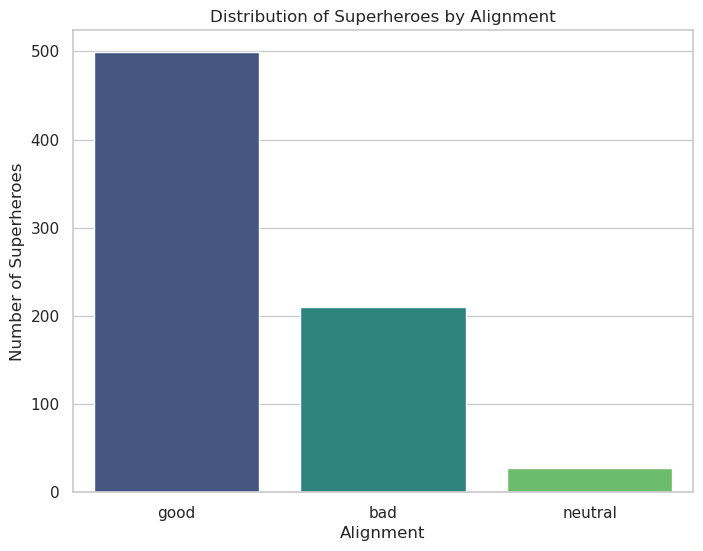

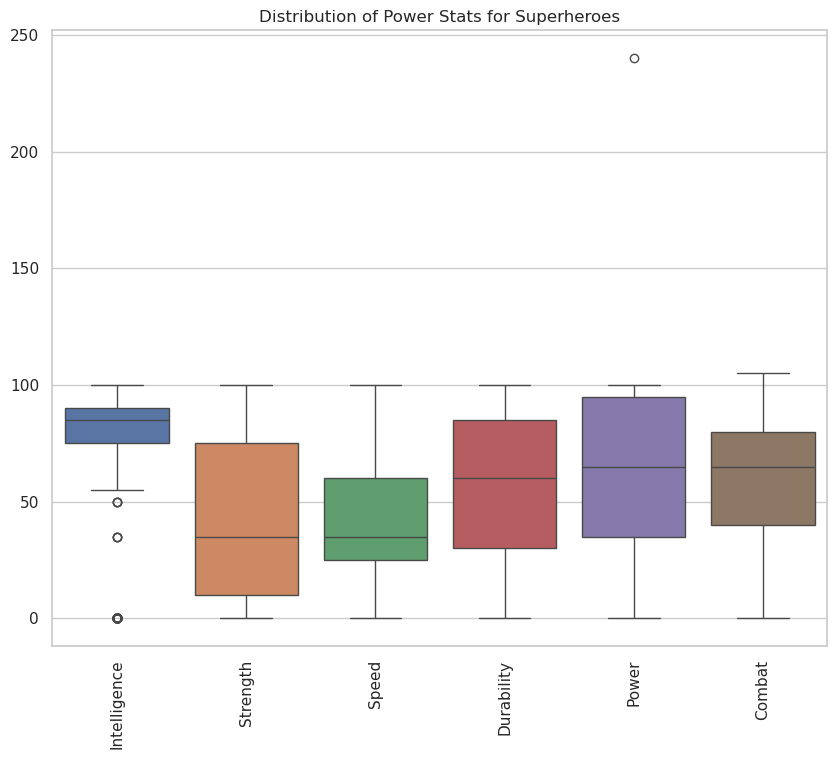

ValueError: could not convert string to float: "6'2 // 188 cm"

<Figure size 1000x800 with 0 Axes>

In [17]:
###6.

# Superheroes have been a part of our culture for decades, bringing larger-than-life characters to the pages of comics and the big screen.
# But what makes a superhero? Is it their strength, intelligence, or maybe their moral alignment—good, bad, or neutral? To answer these questions, we’ll be diving into a dataset that gives us a behind-the-scenes look at superheroes' powers, traits, and more.

## This dataset includes information on superheroes' Height, Weight, Intelligence, Strength, Speed, and other key abilities, along with details like their Gender and Alignment. 

#Our goal is to explore this data to uncover interesting patterns, such as:

   # How many superheroes are good, bad, or neutral?
   # What are the most common traits among heroes and villains?
   # Are there notable differences in powers between male and female superheroes?
   # Do certain powers tend to go hand-in-hand?

# To do this, we’ll start by summarizing the data with some basic statistics and then use visualizations to get a clearer picture of what’s going on. By the end of the analysis, we’ll have a better sense of how superheroes stack up against each other and what makes them truly "super."


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv'
df = pd.read_csv(url)

# Check the first few rows
df.head()

# Basic information about the data
df.info()

# Summary statistics for numerical columns
numerical_cols = ['Height', 'Weight', 'Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']
summary_stats = df[numerical_cols].describe()
print(summary_stats)

# Cleaning the data: Handling missing values
df_clean = df.dropna(subset=numerical_cols)

# Distribution of superheroes by alignment
alignment_counts = df_clean['Alignment'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=alignment_counts.index, y=alignment_counts.values, palette='viridis')
plt.title('Distribution of Superheroes by Alignment')
plt.ylabel('Number of Superheroes')
plt.show()

# Box plot for comparing power stats
plt.figure(figsize=(10,8))
sns.boxplot(data=df_clean[numerical_cols])
plt.title('Distribution of Power Stats for Superheroes')
plt.xticks(rotation=90)
plt.show()

# Correlation heatmap of power stats
plt.figure(figsize=(10,8))
corr_matrix = df_clean[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Power Stats')
plt.show()

# Comparison of stats between male and female superheroes
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Strength', data=df_clean)
plt.title('Comparison of Strength between Male and Female Superheroes')
plt.show()




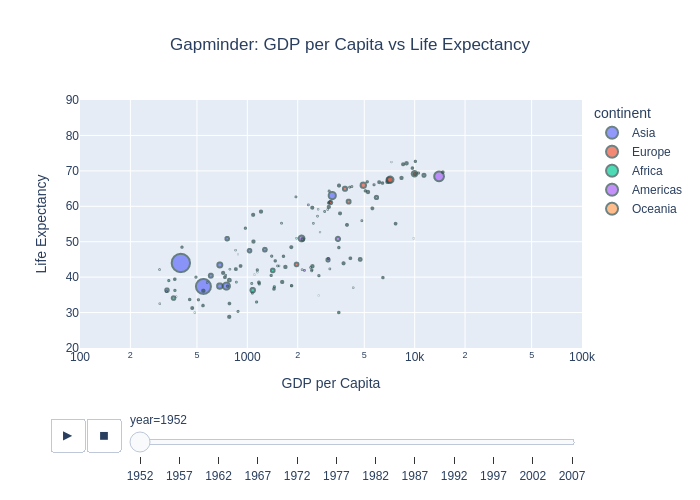

In [14]:
###7.

import pandas as pd
import plotly.express as px

# Load the Gapminder dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
gapminder_df = pd.read_csv(url)

# Create an animated scatter plot
fig = px.scatter(
    gapminder_df,
    x='gdpPercap',
    y='lifeExp',
    animation_frame='year',
    animation_group='country',
    size='pop',
    color='continent',
    hover_name='country',
    log_x=True,  # Use logarithmic scale for x-axis
    title='Gapminder: GDP per Capita vs Life Expectancy',
    range_x=[100, 100000],  # Set x-axis range
    range_y=[20, 90]  # Set y-axis range
)

# Update the layout for better visualization
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(
    title_text='Gapminder: GDP per Capita vs Life Expectancy',
    title_x=0.5,
    xaxis_title='GDP per Capita',
    yaxis_title='Life Expectancy',
    showlegend=True
)

# Show the plot
fig.show(renderer="png")



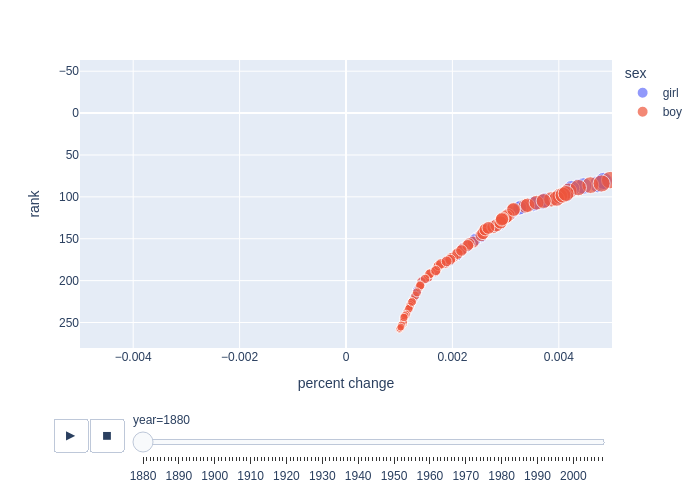

In [16]:
###8.

import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex'] 

# Create a rank column
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort values by name and year
bn = bn.sort_values(['name', 'year'])

# Create the 'percent change' column
bn['percent change'] = bn['percent'].diff()

# Identify new names and set 'percent change' for them
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort the dataframe by year
bn = bn.sort_values('year')

# Restrict to "common" names (percent > 0.001)
bn = bn[bn.percent > 0.001]

# Create the scatter plot
fig = px.scatter(
    bn, 
    x='percent change',  # x-axis is 'percent change'
    y='rank',  # y-axis is 'rank'
    animation_frame='year',  # animation by year
    animation_group='name',  # group by name
    size='percent',  # size of bubbles is 'percent'
    color='sex',  # color by 'sex'
    hover_name='name',  # hover information is 'name'
    size_max=50,  # maximum size of bubbles
    range_x=[-0.005, 0.005]  # x-axis range
)

# Reverse the y-axis to put rank 1 at the top
fig.update_yaxes(autorange='reversed')
fig.show(renderer="png")


In [17]:
### Session Summary for question 7 and 8:

# In this session, we discussed modifying an animated Plotly scatter plot to visualize trends in baby name popularity over time. 
# We focused on customizing the x-axis to display "percent change" in name prevalence and the y-axis to represent name "rank." 
#We also adjusted the bubble size to reflect "percent" prevalence and colored the bubbles by "sex."

# We talked about animating the plot over the "year" column, ensuring names were consistently grouped, and using hover text to display names. 
# To improve clarity, we reversed the y-axis so top-ranked names appeared at the top, and restricted the x-axis to highlight small changes in prevalence. 
# Additionally, we set size_max=50 for better bubble size representation.

# Finally, we discussed using fig.show(renderer="png") to generate a PNG format for submission purposes, ensuring compatibility for GitHub or MarkUs.
# This session combined plotting techniques with dataset transformations to create a dynamic visualization of baby name trends.


In [ ]:
###9.

## Somewhat

